## NOW WITH GPU PROFILING!

## HDNN Demo

In [1]:
import ipyexperiments

In [2]:
import gc

In [3]:
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torch.utils.data as data_utils
from torchdiffeq import odeint, odeint_adjoint

# nome che fa figo
from torchcontrol.arch_cpugpu import HDNN
from torchcontrol.predictors import MLP, CNN
from torchcontrol.utils import genpoints, dump_tensors

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
for obj in gc.get_objects():
    try:
        if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
            print(type(obj), obj.size())
    except: pass

In [6]:
dump_tensors()

Total size: 0


### Data generation

In [7]:
data = 'moons'

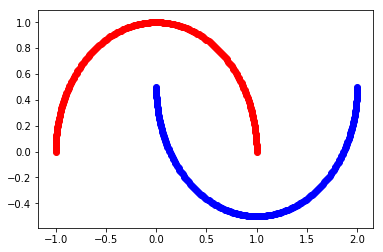

In [8]:
if data == 'blobs':
    X,yn = datasets.make_blobs(n_samples=100, centers = 2,n_features=2)
    plt.scatter(X[yn==1,0],X[yn==1,1],color='blue')
    plt.scatter(X[yn==0,0],X[yn==0,1],color='red')
if data == 'moons':
    X, yn = datasets.make_moons(n_samples=500)
    plt.scatter(X[yn==1,0],X[yn==1,1],color='blue')
    plt.scatter(X[yn==0,0],X[yn==0,1],color='red')
if data == 'mclass':
    X, yn = datasets.make_classification(n_samples=200,n_informative=4,n_clusters_per_class=3,n_classes=3)
    plt.scatter(X[yn==1,0],X[yn==1,1],color='blue')
    plt.scatter(X[yn==0,0],X[yn==0,1],color='red')
    plt.scatter(X[yn==2,0],X[yn==2,1],color='green')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, yn, test_size=0.2)

In [10]:
# choose batch size here
bs = 400

X_train = torch.Tensor(X_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
X_test = torch.Tensor(X_test).to(device)
y_test = torch.LongTensor(y_test).to(device)

train = data_utils.TensorDataset(X_train,y_train)
trainloader = data_utils.DataLoader(train, batch_size=bs, shuffle=True)

test = data_utils.TensorDataset(X_test,y_test)
testloader = data_utils.DataLoader(test, batch_size=bs, shuffle=True)

## Learning a boundary in R2

-  HDNN wrapper is initialized with a predictor (also nn.Module) as input that is used during inference and the parameters of which are updated according to hamiltonian dynamics. The default fully connected network class is given as a baseline. 
-  NOTE: Bigger nets might require high amounts of CUDA memory and might thus crash. Further optimization is required

In [11]:
exp1 = ipyexperiments.IPyExperimentsPytorch()


*** Experiment started with the Pytorch backend
Device: ID 0, GeForce GTX 1060 3GB (3072 RAM)


*** Current state:
RAM:  Used  Free  Total      Util
CPU:  1180  8453  16304 MB   7.24% 
GPU:  1420  1651   3072 MB  46.25% 


･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:00.000
･ CPU:         0       0     1180 MB |
･ GPU:         0       0     1420 MB |


In [64]:
# example: [2,12,2] are the dense layers of the MLP predictor used, \
# whereas [1,2,0] are the a,b,c of the loss function. 2 is beta 
m = HDNN([2,8,8,8,2],'MLP',[1,3,0.01],1,odeint='cpu').cuda()

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:00.004
･ CPU:         0       0     1473 MB |
･ GPU:         6       0     1621 MB |


In [13]:
# alternatively, using a CNN is also a possiblity
m = HDNN([1,12,12],'CNN',[1,2,0.2],1,[192,3]).cuda()

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:00.004
･ CPU:         0       0     1183 MB |
･ GPU:         0       0     1364 MB |


In [65]:
print('Initial accuracy on training dataset: {} %'.format(m.pred_accuracy(trainloader)))

Initial accuracy on training dataset: 0.5025 %
･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:00.072
･ CPU:         0       0     1473 MB |
･ GPU:        -1       1     1619 MB |


In [66]:
m.fit(trainloader,1,time_delta=100,iter_accuracy=10,ode_t=200,ode_step=2)

odeint iter: 10 
odeint iter: 20 
odeint iter: 30 
odeint iter: 40 
odeint iter: 50 
odeint iter: 60 
odeint iter: 70 
odeint iter: 80 
odeint iter: 90 
odeint iter: 100 
odeint iter: 110 
odeint iter: 120 
odeint iter: 130 
odeint iter: 140 
odeint iter: 150 
odeint iter: 160 
odeint iter: 170 
odeint iter: 180 
odeint iter: 190 
odeint iter: 200 
odeint iter: 210 
odeint iter: 220 
odeint iter: 230 
odeint iter: 240 
odeint iter: 250 
odeint iter: 260 
odeint iter: 270 
odeint iter: 280 
odeint iter: 290 
odeint iter: 300 
odeint iter: 310 
odeint iter: 320 
odeint iter: 330 
odeint iter: 340 
odeint iter: 350 
odeint iter: 360 
odeint iter: 370 
odeint iter: 380 
odeint iter: 390 
odeint iter: 400 
odeint iter: 410 
odeint iter: 420 
odeint iter: 430 
odeint iter: 440 
odeint iter: 450 
odeint iter: 460 
odeint iter: 470 
odeint iter: 480 
odeint iter: 490 
odeint iter: 500 
odeint iter: 510 
odeint iter: 520 
odeint iter: 530 
odeint iter: 540 
odeint iter: 550 
odeint iter: 560 
o

odeint iter: 4390 
odeint iter: 4400 
odeint iter: 4410 
odeint iter: 4420 
odeint iter: 4430 
odeint iter: 4440 
odeint iter: 4450 
odeint iter: 4460 
odeint iter: 4470 
odeint iter: 4480 
odeint iter: 4490 
odeint iter: 4500 
odeint iter: 4510 
odeint iter: 4520 
odeint iter: 4530 
odeint iter: 4540 
odeint iter: 4550 
odeint iter: 4560 
odeint iter: 4570 
odeint iter: 4580 
odeint iter: 4590 
odeint iter: 4600 
odeint iter: 4610 
odeint iter: 4620 
odeint iter: 4630 
odeint iter: 4640 
odeint iter: 4650 
odeint iter: 4660 
odeint iter: 4670 
odeint iter: 4680 
odeint iter: 4690 
odeint iter: 4700 
odeint iter: 4710 
odeint iter: 4720 
odeint iter: 4730 
odeint iter: 4740 
odeint iter: 4750 
odeint iter: 4760 
odeint iter: 4770 
odeint iter: 4780 
odeint iter: 4790 
odeint iter: 4800 
odeint iter: 4810 
odeint iter: 4820 
odeint iter: 4830 
odeint iter: 4840 
odeint iter: 4850 
odeint iter: 4860 
odeint iter: 4870 
odeint iter: 4880 
odeint iter: 4890 
odeint iter: 4900 
odeint iter:

odeint iter: 8710 
odeint iter: 8720 
odeint iter: 8730 
odeint iter: 8740 
odeint iter: 8750 
odeint iter: 8760 
odeint iter: 8770 
odeint iter: 8780 
odeint iter: 8790 
odeint iter: 8800 
odeint iter: 8810 
odeint iter: 8820 
odeint iter: 8830 
odeint iter: 8840 
odeint iter: 8850 
odeint iter: 8860 
odeint iter: 8870 
odeint iter: 8880 
odeint iter: 8890 
odeint iter: 8900 
odeint iter: 8910 
odeint iter: 8920 
odeint iter: 8930 
odeint iter: 8940 
odeint iter: 8950 
odeint iter: 8960 
odeint iter: 8970 
odeint iter: 8980 
odeint iter: 8990 
odeint iter: 9000 
odeint iter: 9010 
odeint iter: 9020 
odeint iter: 9030 
odeint iter: 9040 
odeint iter: 9050 
odeint iter: 9060 
odeint iter: 9070 
odeint iter: 9080 
odeint iter: 9090 
odeint iter: 9100 
odeint iter: 9110 
odeint iter: 9120 
odeint iter: 9130 
odeint iter: 9140 
odeint iter: 9150 
odeint iter: 9160 
odeint iter: 9170 
odeint iter: 9180 
odeint iter: 9190 
odeint iter: 9200 
odeint iter: 9210 
odeint iter: 9220 
odeint iter:

odeint iter: 12880 
odeint iter: 12890 
odeint iter: 12900 
odeint iter: 12910 
odeint iter: 12920 
odeint iter: 12930 
odeint iter: 12940 
odeint iter: 12950 
odeint iter: 12960 
odeint iter: 12970 
odeint iter: 12980 
odeint iter: 12990 
odeint iter: 13000 
odeint iter: 13010 
odeint iter: 13020 
odeint iter: 13030 
odeint iter: 13040 
odeint iter: 13050 
odeint iter: 13060 
odeint iter: 13070 
odeint iter: 13080 
odeint iter: 13090 
odeint iter: 13100 
odeint iter: 13110 
odeint iter: 13120 
odeint iter: 13130 
odeint iter: 13140 
odeint iter: 13150 
odeint iter: 13160 
odeint iter: 13170 
odeint iter: 13180 
odeint iter: 13190 
odeint iter: 13200 
odeint iter: 13210 
odeint iter: 13220 
odeint iter: 13230 
odeint iter: 13240 
odeint iter: 13250 
odeint iter: 13260 
odeint iter: 13270 
odeint iter: 13280 
odeint iter: 13290 
odeint iter: 13300 
odeint iter: 13310 
odeint iter: 13320 
odeint iter: 13330 
odeint iter: 13340 
odeint iter: 13350 
odeint iter: 13360 
odeint iter: 13370 


odeint iter: 16990 
odeint iter: 17000 
odeint iter: 17010 
odeint iter: 17020 
odeint iter: 17030 
odeint iter: 17040 
odeint iter: 17050 
odeint iter: 17060 
odeint iter: 17070 
odeint iter: 17080 
odeint iter: 17090 
odeint iter: 17100 
odeint iter: 17110 
odeint iter: 17120 
odeint iter: 17130 
odeint iter: 17140 
odeint iter: 17150 
odeint iter: 17160 
odeint iter: 17170 
odeint iter: 17180 
odeint iter: 17190 
odeint iter: 17200 
odeint iter: 17210 
odeint iter: 17220 
odeint iter: 17230 
odeint iter: 17240 
odeint iter: 17250 
odeint iter: 17260 
odeint iter: 17270 
odeint iter: 17280 
odeint iter: 17290 
odeint iter: 17300 
odeint iter: 17310 
odeint iter: 17320 
odeint iter: 17330 
odeint iter: 17340 
odeint iter: 17350 
odeint iter: 17360 
odeint iter: 17370 
odeint iter: 17380 
odeint iter: 17390 
odeint iter: 17400 
odeint iter: 17410 
odeint iter: 17420 
odeint iter: 17430 
odeint iter: 17440 
odeint iter: 17450 
odeint iter: 17460 
odeint iter: 17470 
odeint iter: 17480 


odeint iter: 21100 
odeint iter: 21110 
odeint iter: 21120 
odeint iter: 21130 
odeint iter: 21140 
odeint iter: 21150 
odeint iter: 21160 
odeint iter: 21170 
odeint iter: 21180 
odeint iter: 21190 
odeint iter: 21200 
odeint iter: 21210 
odeint iter: 21220 
odeint iter: 21230 
odeint iter: 21240 
odeint iter: 21250 
odeint iter: 21260 
odeint iter: 21270 
odeint iter: 21280 
odeint iter: 21290 
odeint iter: 21300 
odeint iter: 21310 
odeint iter: 21320 
odeint iter: 21330 
odeint iter: 21340 
odeint iter: 21350 
odeint iter: 21360 
odeint iter: 21370 
odeint iter: 21380 
odeint iter: 21390 
odeint iter: 21400 
odeint iter: 21410 
odeint iter: 21420 
odeint iter: 21430 
odeint iter: 21440 
odeint iter: 21450 
odeint iter: 21460 
odeint iter: 21470 
odeint iter: 21480 
odeint iter: 21490 
odeint iter: 21500 
odeint iter: 21510 
odeint iter: 21520 
odeint iter: 21530 
odeint iter: 21540 
odeint iter: 21550 
odeint iter: 21560 
odeint iter: 21570 
odeint iter: 21580 
odeint iter: 21590 


odeint iter: 25210 
odeint iter: 25220 
odeint iter: 25230 
odeint iter: 25240 
odeint iter: 25250 
odeint iter: 25260 
odeint iter: 25270 
odeint iter: 25280 
odeint iter: 25290 
odeint iter: 25300 
odeint iter: 25310 
odeint iter: 25320 
odeint iter: 25330 
odeint iter: 25340 
odeint iter: 25350 
odeint iter: 25360 
odeint iter: 25370 
odeint iter: 25380 
odeint iter: 25390 
odeint iter: 25400 
odeint iter: 25410 
odeint iter: 25420 
odeint iter: 25430 
odeint iter: 25440 
odeint iter: 25450 
odeint iter: 25460 
odeint iter: 25470 
odeint iter: 25480 
odeint iter: 25490 
odeint iter: 25500 
odeint iter: 25510 
odeint iter: 25520 
odeint iter: 25530 
odeint iter: 25540 
odeint iter: 25550 
odeint iter: 25560 
odeint iter: 25570 
odeint iter: 25580 
odeint iter: 25590 
odeint iter: 25600 
odeint iter: 25610 
odeint iter: 25620 
odeint iter: 25630 
odeint iter: 25640 
odeint iter: 25650 
odeint iter: 25660 
odeint iter: 25670 
odeint iter: 25680 
odeint iter: 25690 
odeint iter: 25700 


odeint iter: 29320 
odeint iter: 29330 
odeint iter: 29340 
odeint iter: 29350 
odeint iter: 29360 
odeint iter: 29370 
odeint iter: 29380 
odeint iter: 29390 
odeint iter: 29400 
odeint iter: 29410 
odeint iter: 29420 
odeint iter: 29430 
odeint iter: 29440 
odeint iter: 29450 
odeint iter: 29460 
odeint iter: 29470 
odeint iter: 29480 
odeint iter: 29490 
odeint iter: 29500 
odeint iter: 29510 
odeint iter: 29520 
odeint iter: 29530 
odeint iter: 29540 
odeint iter: 29550 
odeint iter: 29560 
odeint iter: 29570 
odeint iter: 29580 
odeint iter: 29590 
odeint iter: 29600 
odeint iter: 29610 
odeint iter: 29620 
odeint iter: 29630 
odeint iter: 29640 
odeint iter: 29650 
odeint iter: 29660 
odeint iter: 29670 
odeint iter: 29680 
odeint iter: 29690 
odeint iter: 29700 
odeint iter: 29710 
odeint iter: 29720 
odeint iter: 29730 
odeint iter: 29740 
odeint iter: 29750 
odeint iter: 29760 
odeint iter: 29770 
odeint iter: 29780 
odeint iter: 29790 
odeint iter: 29800 
odeint iter: 29810 


odeint iter: 33430 
odeint iter: 33440 
odeint iter: 33450 
odeint iter: 33460 
odeint iter: 33470 
odeint iter: 33480 
odeint iter: 33490 
odeint iter: 33500 
odeint iter: 33510 
odeint iter: 33520 
odeint iter: 33530 
odeint iter: 33540 
odeint iter: 33550 
odeint iter: 33560 
odeint iter: 33570 
odeint iter: 33580 
odeint iter: 33590 
odeint iter: 33600 
odeint iter: 33610 
odeint iter: 33620 
odeint iter: 33630 
odeint iter: 33640 
odeint iter: 33650 
odeint iter: 33660 
odeint iter: 33670 
odeint iter: 33680 
odeint iter: 33690 
odeint iter: 33700 
odeint iter: 33710 
odeint iter: 33720 
odeint iter: 33730 
odeint iter: 33740 
odeint iter: 33750 
odeint iter: 33760 
odeint iter: 33770 
odeint iter: 33780 
odeint iter: 33790 
odeint iter: 33800 
odeint iter: 33810 
odeint iter: 33820 
odeint iter: 33830 
odeint iter: 33840 
odeint iter: 33850 
odeint iter: 33860 
odeint iter: 33870 
odeint iter: 33880 
odeint iter: 33890 
odeint iter: 33900 
odeint iter: 33910 
odeint iter: 33920 


odeint iter: 37550 
odeint iter: 37560 
odeint iter: 37570 
odeint iter: 37580 
odeint iter: 37590 
odeint iter: 37600 
odeint iter: 37610 
odeint iter: 37620 
odeint iter: 37630 
odeint iter: 37640 
odeint iter: 37650 
odeint iter: 37660 
odeint iter: 37670 
odeint iter: 37680 
odeint iter: 37690 
odeint iter: 37700 
odeint iter: 37710 
odeint iter: 37720 
odeint iter: 37730 
odeint iter: 37740 
odeint iter: 37750 
odeint iter: 37760 
odeint iter: 37770 
odeint iter: 37780 
odeint iter: 37790 
odeint iter: 37800 
odeint iter: 37810 
odeint iter: 37820 
odeint iter: 37830 
odeint iter: 37840 
odeint iter: 37850 
odeint iter: 37860 
odeint iter: 37870 
odeint iter: 37880 
odeint iter: 37890 
odeint iter: 37900 
odeint iter: 37910 
odeint iter: 37920 
odeint iter: 37930 
odeint iter: 37940 
odeint iter: 37950 
odeint iter: 37960 
odeint iter: 37970 
odeint iter: 37980 
odeint iter: 37990 
odeint iter: 38000 
odeint iter: 38010 
odeint iter: 38020 
odeint iter: 38030 
odeint iter: 38040 


odeint iter: 41660 
odeint iter: 41670 
odeint iter: 41680 
odeint iter: 41690 
odeint iter: 41700 
odeint iter: 41710 
odeint iter: 41720 
odeint iter: 41730 
odeint iter: 41740 
odeint iter: 41750 
odeint iter: 41760 
odeint iter: 41770 
odeint iter: 41780 
odeint iter: 41790 
odeint iter: 41800 
odeint iter: 41810 
odeint iter: 41820 
odeint iter: 41830 
odeint iter: 41840 
odeint iter: 41850 
odeint iter: 41860 
odeint iter: 41870 
odeint iter: 41880 
odeint iter: 41890 
odeint iter: 41900 
odeint iter: 41910 
odeint iter: 41920 
odeint iter: 41930 
odeint iter: 41940 
odeint iter: 41950 
odeint iter: 41960 
odeint iter: 41970 
odeint iter: 41980 
odeint iter: 41990 
odeint iter: 42000 
odeint iter: 42010 
odeint iter: 42020 
odeint iter: 42030 
odeint iter: 42040 
odeint iter: 42050 
odeint iter: 42060 
odeint iter: 42070 
odeint iter: 42080 
odeint iter: 42090 
odeint iter: 42100 
odeint iter: 42110 
odeint iter: 42120 
odeint iter: 42130 
odeint iter: 42140 
odeint iter: 42150 


odeint iter: 45770 
odeint iter: 45780 
odeint iter: 45790 
odeint iter: 45800 
odeint iter: 45810 
odeint iter: 45820 
odeint iter: 45830 
odeint iter: 45840 
odeint iter: 45850 
odeint iter: 45860 
odeint iter: 45870 
odeint iter: 45880 
odeint iter: 45890 
odeint iter: 45900 
odeint iter: 45910 
odeint iter: 45920 
odeint iter: 45930 
odeint iter: 45940 
odeint iter: 45950 
odeint iter: 45960 
odeint iter: 45970 
odeint iter: 45980 
odeint iter: 45990 
odeint iter: 46000 
odeint iter: 46010 
odeint iter: 46020 
odeint iter: 46030 
odeint iter: 46040 
odeint iter: 46050 
odeint iter: 46060 
odeint iter: 46070 
odeint iter: 46080 
odeint iter: 46090 
odeint iter: 46100 
odeint iter: 46110 
odeint iter: 46120 
odeint iter: 46130 
odeint iter: 46140 
odeint iter: 46150 
odeint iter: 46160 
odeint iter: 46170 
odeint iter: 46180 
odeint iter: 46190 
odeint iter: 46200 
odeint iter: 46210 
odeint iter: 46220 
odeint iter: 46230 
odeint iter: 46240 
odeint iter: 46250 
odeint iter: 46260 


odeint iter: 49870 
odeint iter: 49880 
odeint iter: 49890 
odeint iter: 49900 
odeint iter: 49910 
odeint iter: 49920 
odeint iter: 49930 
odeint iter: 49940 
odeint iter: 49950 
odeint iter: 49960 
odeint iter: 49970 
odeint iter: 49980 
odeint iter: 49990 
odeint iter: 50000 
odeint iter: 50010 
odeint iter: 50020 
odeint iter: 50030 
odeint iter: 50040 
odeint iter: 50050 
odeint iter: 50060 
odeint iter: 50070 
odeint iter: 50080 
odeint iter: 50090 
odeint iter: 50100 
odeint iter: 50110 
odeint iter: 50120 
odeint iter: 50130 
odeint iter: 50140 
odeint iter: 50150 
odeint iter: 50160 
odeint iter: 50170 
odeint iter: 50180 
odeint iter: 50190 
odeint iter: 50200 
odeint iter: 50210 
odeint iter: 50220 
odeint iter: 50230 
odeint iter: 50240 
odeint iter: 50250 
odeint iter: 50260 
odeint iter: 50270 
odeint iter: 50280 
odeint iter: 50290 
odeint iter: 50300 
odeint iter: 50310 
odeint iter: 50320 
odeint iter: 50330 
odeint iter: 50340 
odeint iter: 50350 
odeint iter: 50360 


odeint iter: 53960 
odeint iter: 53970 
odeint iter: 53980 
odeint iter: 53990 
odeint iter: 54000 
odeint iter: 54010 
odeint iter: 54020 
odeint iter: 54030 
odeint iter: 54040 
odeint iter: 54050 
odeint iter: 54060 
odeint iter: 54070 
odeint iter: 54080 
odeint iter: 54090 
odeint iter: 54100 
odeint iter: 54110 
odeint iter: 54120 
odeint iter: 54130 
odeint iter: 54140 
odeint iter: 54150 
odeint iter: 54160 
odeint iter: 54170 
odeint iter: 54180 
odeint iter: 54190 
odeint iter: 54200 
odeint iter: 54210 
odeint iter: 54220 
odeint iter: 54230 
odeint iter: 54240 
odeint iter: 54250 
odeint iter: 54260 
odeint iter: 54270 
odeint iter: 54280 
odeint iter: 54290 
odeint iter: 54300 
odeint iter: 54310 
odeint iter: 54320 
odeint iter: 54330 
odeint iter: 54340 
odeint iter: 54350 
odeint iter: 54360 
odeint iter: 54370 
odeint iter: 54380 
odeint iter: 54390 
odeint iter: 54400 
odeint iter: 54410 
odeint iter: 54420 
odeint iter: 54430 
odeint iter: 54440 
odeint iter: 54450 


odeint iter: 58070 
odeint iter: 58080 
odeint iter: 58090 
odeint iter: 58100 
odeint iter: 58110 
odeint iter: 58120 
odeint iter: 58130 
odeint iter: 58140 
odeint iter: 58150 
odeint iter: 58160 
odeint iter: 58170 
odeint iter: 58180 
odeint iter: 58190 
odeint iter: 58200 
odeint iter: 58210 
odeint iter: 58220 
odeint iter: 58230 
odeint iter: 58240 
odeint iter: 58250 
odeint iter: 58260 
odeint iter: 58270 
odeint iter: 58280 
odeint iter: 58290 
odeint iter: 58300 
odeint iter: 58310 
odeint iter: 58320 
odeint iter: 58330 
odeint iter: 58340 
odeint iter: 58350 
odeint iter: 58360 
odeint iter: 58370 
odeint iter: 58380 
odeint iter: 58390 
odeint iter: 58400 
odeint iter: 58410 
odeint iter: 58420 
odeint iter: 58430 
odeint iter: 58440 
odeint iter: 58450 
odeint iter: 58460 
odeint iter: 58470 
odeint iter: 58480 
odeint iter: 58490 
odeint iter: 58500 
odeint iter: 58510 
odeint iter: 58520 
odeint iter: 58530 
odeint iter: 58540 
odeint iter: 58550 
odeint iter: 58560 


odeint iter: 62180 
odeint iter: 62190 
odeint iter: 62200 
odeint iter: 62210 
odeint iter: 62220 
odeint iter: 62230 
odeint iter: 62240 
odeint iter: 62250 
odeint iter: 62260 
odeint iter: 62270 
odeint iter: 62280 
odeint iter: 62290 
odeint iter: 62300 
odeint iter: 62310 
odeint iter: 62320 
odeint iter: 62330 
odeint iter: 62340 
odeint iter: 62350 
odeint iter: 62360 
odeint iter: 62370 
odeint iter: 62380 
odeint iter: 62390 
odeint iter: 62400 
odeint iter: 62410 
odeint iter: 62420 
odeint iter: 62430 
odeint iter: 62440 
odeint iter: 62450 
odeint iter: 62460 
odeint iter: 62470 
odeint iter: 62480 
odeint iter: 62490 
odeint iter: 62500 
odeint iter: 62510 
odeint iter: 62520 
odeint iter: 62530 
odeint iter: 62540 
odeint iter: 62550 
odeint iter: 62560 
odeint iter: 62570 
odeint iter: 62580 
odeint iter: 62590 
odeint iter: 62600 
odeint iter: 62610 
odeint iter: 62620 
odeint iter: 62630 
odeint iter: 62640 
odeint iter: 62650 
odeint iter: 62660 
odeint iter: 62670 


odeint iter: 66270 
odeint iter: 66280 
odeint iter: 66290 
odeint iter: 66300 
odeint iter: 66310 
odeint iter: 66320 
odeint iter: 66330 
odeint iter: 66340 
odeint iter: 66350 
odeint iter: 66360 
odeint iter: 66370 
odeint iter: 66380 
odeint iter: 66390 
odeint iter: 66400 
odeint iter: 66410 
odeint iter: 66420 
odeint iter: 66430 
odeint iter: 66440 
odeint iter: 66450 
odeint iter: 66460 
odeint iter: 66470 
odeint iter: 66480 
odeint iter: 66490 
odeint iter: 66500 
odeint iter: 66510 
odeint iter: 66520 
odeint iter: 66530 
odeint iter: 66540 
odeint iter: 66550 
odeint iter: 66560 
odeint iter: 66570 
odeint iter: 66580 
odeint iter: 66590 
odeint iter: 66600 
odeint iter: 66610 
odeint iter: 66620 
odeint iter: 66630 
odeint iter: 66640 
odeint iter: 66650 
odeint iter: 66660 
odeint iter: 66670 
odeint iter: 66680 
odeint iter: 66690 
odeint iter: 66700 
odeint iter: 66710 
odeint iter: 66720 
odeint iter: 66730 
odeint iter: 66740 
odeint iter: 66750 
odeint iter: 66760 


odeint iter: 70370 
odeint iter: 70380 
odeint iter: 70390 
odeint iter: 70400 
odeint iter: 70410 
odeint iter: 70420 
odeint iter: 70430 
odeint iter: 70440 
odeint iter: 70450 
odeint iter: 70460 
odeint iter: 70470 
odeint iter: 70480 
odeint iter: 70490 
odeint iter: 70500 
odeint iter: 70510 
odeint iter: 70520 
odeint iter: 70530 
odeint iter: 70540 
odeint iter: 70550 
odeint iter: 70560 
odeint iter: 70570 
odeint iter: 70580 
odeint iter: 70590 
odeint iter: 70600 
odeint iter: 70610 
odeint iter: 70620 
odeint iter: 70630 
odeint iter: 70640 
odeint iter: 70650 
odeint iter: 70660 
odeint iter: 70670 
odeint iter: 70680 
odeint iter: 70690 
odeint iter: 70700 
odeint iter: 70710 
odeint iter: 70720 
odeint iter: 70730 
odeint iter: 70740 
odeint iter: 70750 
odeint iter: 70760 
odeint iter: 70770 
odeint iter: 70780 
odeint iter: 70790 
odeint iter: 70800 
odeint iter: 70810 
odeint iter: 70820 
odeint iter: 70830 
odeint iter: 70840 
odeint iter: 70850 
odeint iter: 70860 


odeint iter: 74490 
odeint iter: 74500 
odeint iter: 74510 
odeint iter: 74520 
odeint iter: 74530 
odeint iter: 74540 
odeint iter: 74550 
odeint iter: 74560 
odeint iter: 74570 
odeint iter: 74580 
odeint iter: 74590 
odeint iter: 74600 
odeint iter: 74610 
odeint iter: 74620 
odeint iter: 74630 
odeint iter: 74640 
odeint iter: 74650 
odeint iter: 74660 
odeint iter: 74670 
odeint iter: 74680 
odeint iter: 74690 
odeint iter: 74700 
odeint iter: 74710 
odeint iter: 74720 
odeint iter: 74730 
odeint iter: 74740 
odeint iter: 74750 
odeint iter: 74760 
odeint iter: 74770 
odeint iter: 74780 
odeint iter: 74790 
odeint iter: 74800 
odeint iter: 74810 
odeint iter: 74820 
odeint iter: 74830 
odeint iter: 74840 
odeint iter: 74850 
odeint iter: 74860 
odeint iter: 74870 
odeint iter: 74880 
odeint iter: 74890 
odeint iter: 74900 
odeint iter: 74910 
odeint iter: 74920 
odeint iter: 74930 
odeint iter: 74940 
odeint iter: 74950 
odeint iter: 74960 
odeint iter: 74970 
odeint iter: 74980 


odeint iter: 78600 
odeint iter: 78610 
odeint iter: 78620 
odeint iter: 78630 
odeint iter: 78640 
odeint iter: 78650 
odeint iter: 78660 
odeint iter: 78670 
odeint iter: 78680 
odeint iter: 78690 
odeint iter: 78700 
odeint iter: 78710 
odeint iter: 78720 
odeint iter: 78730 
odeint iter: 78740 
odeint iter: 78750 
odeint iter: 78760 
odeint iter: 78770 
odeint iter: 78780 
odeint iter: 78790 
odeint iter: 78800 
odeint iter: 78810 
odeint iter: 78820 
odeint iter: 78830 
odeint iter: 78840 
odeint iter: 78850 
odeint iter: 78860 
odeint iter: 78870 
odeint iter: 78880 
odeint iter: 78890 
odeint iter: 78900 
odeint iter: 78910 
odeint iter: 78920 
odeint iter: 78930 
odeint iter: 78940 
odeint iter: 78950 
odeint iter: 78960 
odeint iter: 78970 
odeint iter: 78980 
odeint iter: 78990 
odeint iter: 79000 
odeint iter: 79010 
odeint iter: 79020 
odeint iter: 79030 
odeint iter: 79040 
odeint iter: 79050 
odeint iter: 79060 
odeint iter: 79070 
odeint iter: 79080 
odeint iter: 79090 


odeint iter: 82710 
odeint iter: 82720 
odeint iter: 82730 
odeint iter: 82740 
odeint iter: 82750 
odeint iter: 82760 
odeint iter: 82770 
odeint iter: 82780 
odeint iter: 82790 
odeint iter: 82800 
odeint iter: 82810 
odeint iter: 82820 
odeint iter: 82830 
odeint iter: 82840 
odeint iter: 82850 
odeint iter: 82860 
odeint iter: 82870 
odeint iter: 82880 
odeint iter: 82890 
odeint iter: 82900 
odeint iter: 82910 
odeint iter: 82920 
odeint iter: 82930 
odeint iter: 82940 
odeint iter: 82950 
odeint iter: 82960 
odeint iter: 82970 
odeint iter: 82980 
odeint iter: 82990 
odeint iter: 83000 
odeint iter: 83010 
odeint iter: 83020 
odeint iter: 83030 
odeint iter: 83040 
odeint iter: 83050 
odeint iter: 83060 
odeint iter: 83070 
odeint iter: 83080 
odeint iter: 83090 
odeint iter: 83100 
odeint iter: 83110 
odeint iter: 83120 
odeint iter: 83130 
odeint iter: 83140 
odeint iter: 83150 
odeint iter: 83160 
odeint iter: 83170 
odeint iter: 83180 
odeint iter: 83190 
odeint iter: 83200 


odeint iter: 86810 
odeint iter: 86820 
odeint iter: 86830 
odeint iter: 86840 
odeint iter: 86850 
odeint iter: 86860 
odeint iter: 86870 
odeint iter: 86880 
odeint iter: 86890 
odeint iter: 86900 
odeint iter: 86910 
odeint iter: 86920 
odeint iter: 86930 
odeint iter: 86940 
odeint iter: 86950 
odeint iter: 86960 
odeint iter: 86970 
odeint iter: 86980 
odeint iter: 86990 
odeint iter: 87000 
odeint iter: 87010 
odeint iter: 87020 
odeint iter: 87030 
odeint iter: 87040 
odeint iter: 87050 
odeint iter: 87060 
odeint iter: 87070 
odeint iter: 87080 
odeint iter: 87090 
odeint iter: 87100 
odeint iter: 87110 
odeint iter: 87120 
odeint iter: 87130 
odeint iter: 87140 
odeint iter: 87150 
odeint iter: 87160 
odeint iter: 87170 
odeint iter: 87180 
odeint iter: 87190 
odeint iter: 87200 
odeint iter: 87210 
odeint iter: 87220 
odeint iter: 87230 
odeint iter: 87240 
odeint iter: 87250 
odeint iter: 87260 
odeint iter: 87270 
odeint iter: 87280 
odeint iter: 87290 
odeint iter: 87300 


odeint iter: 90910 
odeint iter: 90920 
odeint iter: 90930 
odeint iter: 90940 
odeint iter: 90950 
odeint iter: 90960 
odeint iter: 90970 
odeint iter: 90980 
odeint iter: 90990 
odeint iter: 91000 
odeint iter: 91010 
odeint iter: 91020 
odeint iter: 91030 
odeint iter: 91040 
odeint iter: 91050 
odeint iter: 91060 
odeint iter: 91070 
odeint iter: 91080 
odeint iter: 91090 
odeint iter: 91100 
odeint iter: 91110 
odeint iter: 91120 
odeint iter: 91130 
odeint iter: 91140 
odeint iter: 91150 
odeint iter: 91160 
odeint iter: 91170 
odeint iter: 91180 
odeint iter: 91190 
odeint iter: 91200 
odeint iter: 91210 
odeint iter: 91220 
odeint iter: 91230 
odeint iter: 91240 
odeint iter: 91250 
odeint iter: 91260 
odeint iter: 91270 
odeint iter: 91280 
odeint iter: 91290 
odeint iter: 91300 
odeint iter: 91310 
odeint iter: 91320 
odeint iter: 91330 
odeint iter: 91340 
odeint iter: 91350 
odeint iter: 91360 
odeint iter: 91370 
odeint iter: 91380 
odeint iter: 91390 
odeint iter: 91400 


odeint iter: 95010 
odeint iter: 95020 
odeint iter: 95030 
odeint iter: 95040 
odeint iter: 95050 
odeint iter: 95060 
odeint iter: 95070 
odeint iter: 95080 
odeint iter: 95090 
odeint iter: 95100 
odeint iter: 95110 
odeint iter: 95120 
odeint iter: 95130 
odeint iter: 95140 
odeint iter: 95150 
odeint iter: 95160 
odeint iter: 95170 
odeint iter: 95180 
odeint iter: 95190 
odeint iter: 95200 
odeint iter: 95210 
odeint iter: 95220 
odeint iter: 95230 
odeint iter: 95240 
odeint iter: 95250 
odeint iter: 95260 
odeint iter: 95270 
odeint iter: 95280 
odeint iter: 95290 
odeint iter: 95300 
odeint iter: 95310 
odeint iter: 95320 
odeint iter: 95330 
odeint iter: 95340 
odeint iter: 95350 
odeint iter: 95360 
odeint iter: 95370 
odeint iter: 95380 
odeint iter: 95390 
odeint iter: 95400 
odeint iter: 95410 
odeint iter: 95420 
odeint iter: 95430 
odeint iter: 95440 
odeint iter: 95450 
odeint iter: 95460 
odeint iter: 95470 
odeint iter: 95480 
odeint iter: 95490 
odeint iter: 95500 


odeint iter: 99130 
odeint iter: 99140 
odeint iter: 99150 
odeint iter: 99160 
odeint iter: 99170 
odeint iter: 99180 
odeint iter: 99190 
odeint iter: 99200 
odeint iter: 99210 
odeint iter: 99220 
odeint iter: 99230 
odeint iter: 99240 
odeint iter: 99250 
odeint iter: 99260 
odeint iter: 99270 
odeint iter: 99280 
odeint iter: 99290 
odeint iter: 99300 
odeint iter: 99310 
odeint iter: 99320 
odeint iter: 99330 
odeint iter: 99340 
odeint iter: 99350 
odeint iter: 99360 
odeint iter: 99370 
odeint iter: 99380 
odeint iter: 99390 
odeint iter: 99400 
odeint iter: 99410 
odeint iter: 99420 
odeint iter: 99430 
odeint iter: 99440 
odeint iter: 99450 
odeint iter: 99460 
odeint iter: 99470 
odeint iter: 99480 
odeint iter: 99490 
odeint iter: 99500 
odeint iter: 99510 
odeint iter: 99520 
odeint iter: 99530 
odeint iter: 99540 
odeint iter: 99550 
odeint iter: 99560 
odeint iter: 99570 
odeint iter: 99580 
odeint iter: 99590 
odeint iter: 99600 
odeint iter: 99610 
odeint iter: 99620 


odeint iter: 103090 
odeint iter: 103100 
odeint iter: 103110 
odeint iter: 103120 
odeint iter: 103130 
odeint iter: 103140 
odeint iter: 103150 
odeint iter: 103160 
odeint iter: 103170 
odeint iter: 103180 
odeint iter: 103190 
odeint iter: 103200 
odeint iter: 103210 
odeint iter: 103220 
odeint iter: 103230 
odeint iter: 103240 
odeint iter: 103250 
odeint iter: 103260 
odeint iter: 103270 
odeint iter: 103280 
odeint iter: 103290 
odeint iter: 103300 
odeint iter: 103310 
odeint iter: 103320 
odeint iter: 103330 
odeint iter: 103340 
odeint iter: 103350 
odeint iter: 103360 
odeint iter: 103370 
odeint iter: 103380 
odeint iter: 103390 
odeint iter: 103400 
odeint iter: 103410 
odeint iter: 103420 
odeint iter: 103430 
odeint iter: 103440 
odeint iter: 103450 
odeint iter: 103460 
odeint iter: 103470 
odeint iter: 103480 
odeint iter: 103490 
odeint iter: 103500 
odeint iter: 103510 
odeint iter: 103520 
odeint iter: 103530 
odeint iter: 103540 
odeint iter: 103550 
odeint iter: 

odeint iter: 107010 
odeint iter: 107020 
odeint iter: 107030 
odeint iter: 107040 
odeint iter: 107050 
odeint iter: 107060 
odeint iter: 107070 
odeint iter: 107080 
odeint iter: 107090 
odeint iter: 107100 
odeint iter: 107110 
odeint iter: 107120 
odeint iter: 107130 
odeint iter: 107140 
odeint iter: 107150 
odeint iter: 107160 
odeint iter: 107170 
odeint iter: 107180 
odeint iter: 107190 
odeint iter: 107200 
odeint iter: 107210 
odeint iter: 107220 
odeint iter: 107230 
odeint iter: 107240 
odeint iter: 107250 
odeint iter: 107260 
odeint iter: 107270 
odeint iter: 107280 
odeint iter: 107290 
odeint iter: 107300 
odeint iter: 107310 
odeint iter: 107320 
odeint iter: 107330 
odeint iter: 107340 
odeint iter: 107350 
odeint iter: 107360 
odeint iter: 107370 
odeint iter: 107380 
odeint iter: 107390 
odeint iter: 107400 
odeint iter: 107410 
odeint iter: 107420 
odeint iter: 107430 
odeint iter: 107440 
odeint iter: 107450 
odeint iter: 107460 
odeint iter: 107470 
odeint iter: 

odeint iter: 110940 
odeint iter: 110950 
odeint iter: 110960 
odeint iter: 110970 
odeint iter: 110980 
odeint iter: 110990 
odeint iter: 111000 
odeint iter: 111010 
odeint iter: 111020 
odeint iter: 111030 
odeint iter: 111040 
odeint iter: 111050 
odeint iter: 111060 
odeint iter: 111070 
odeint iter: 111080 
odeint iter: 111090 
odeint iter: 111100 
odeint iter: 111110 
odeint iter: 111120 
odeint iter: 111130 
odeint iter: 111140 
odeint iter: 111150 
odeint iter: 111160 
odeint iter: 111170 
odeint iter: 111180 
odeint iter: 111190 
odeint iter: 111200 
odeint iter: 111210 
odeint iter: 111220 
odeint iter: 111230 
odeint iter: 111240 
odeint iter: 111250 
odeint iter: 111260 
odeint iter: 111270 
odeint iter: 111280 
odeint iter: 111290 
odeint iter: 111300 
odeint iter: 111310 
odeint iter: 111320 
odeint iter: 111330 
odeint iter: 111340 
odeint iter: 111350 
odeint iter: 111360 
odeint iter: 111370 
odeint iter: 111380 
odeint iter: 111390 
odeint iter: 111400 
odeint iter: 

(13201,)

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:12:40.411
･ CPU:        63      78      790 MB |
･ GPU:        18     111     1637 MB |


In [67]:
print('Post-training accuracy on test dataset: {} '.format(m.pred_accuracy(testloader)))

Post-training accuracy on test dataset: 1.0 
･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:00.021
･ CPU:         0       0      748 MB |
･ GPU:        -8       0     1629 MB |


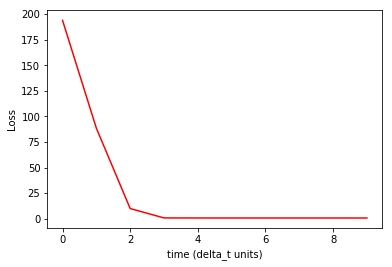

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:00.140
･ CPU:         0       0     1413 MB |
･ GPU:         0       0     1440 MB |


In [84]:
m.plotLoss()

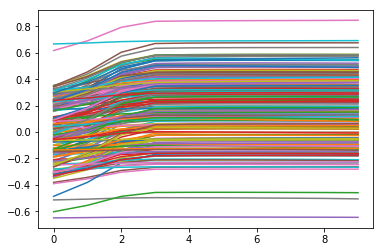

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:00.575
･ CPU:         0       3     1414 MB |
･ GPU:         0       0     1441 MB |


In [85]:
m.plotParameters()

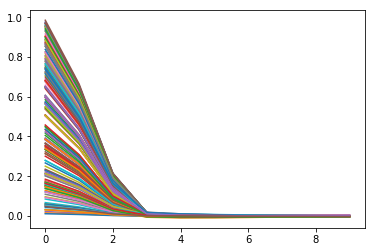

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:00.552
･ CPU:         0       3     1414 MB |
･ GPU:         0       0     1441 MB |


In [86]:
m.plotVelocities()

## Create boundary plot

In [68]:
mp = genpoints(-3,3,-3,3,100)

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:00.073
･ CPU:         0       2      749 MB |
･ GPU:       -10       0     1618 MB |


In [69]:
y,idx = torch.max(torch.exp(m.predictor.forward(mp)),1)

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:00.003
･ CPU:         0       0      749 MB |
･ GPU:         4       0     1622 MB |


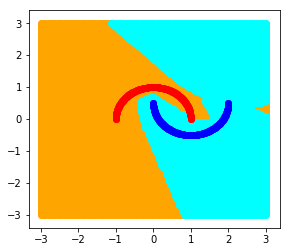

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:00.294
･ CPU:         0       0      750 MB |
･ GPU:         0       0     1622 MB |


In [70]:
mp_r = mp[idx==0]
mp_b = mp[idx==1]
plt.figure(figsize=(4.5,4))
plt.scatter(mp_r[:,0].cpu(),mp_r[:,1].cpu(),color='orange')
plt.scatter(mp_b[:,0].cpu(),mp_b[:,1].cpu(),color='cyan')
plt.scatter(X[yn==1,0],X[yn==1,1],color='blue')
plt.scatter(X[yn==0,0],X[yn==0,1],color='red')

In [32]:
del exp1

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:00.000
･ CPU:         0       0     1246 MB |
･ GPU:         1       0     1015 MB |

IPyExperimentsPytorch: Finishing

*** Experiment finished in 00:10:00 (elapsed wallclock time)

*** Newly defined local variables:
Deleted: idx, m, mp, mp_b, mp_r, y

*** Circular ref objects gc collected during the experiment:
cleared 7 objects (only temporary leakage)

*** Experiment memory:
RAM:  Consumed     Reclaimed
CPU:      70     998 MB (1408.09%)
GPU:     155      99 MB ( 63.88%)

*** Current state:
RAM:  Used  Free  Total      Util
CPU:   248  3535   8143 MB   3.05% 
GPU:   916  2155   3072 MB  29.83% 




## Series of experiments with varying beta

note: with low beta it takes way longer to integrate

In [15]:
def obtain_plot(bhsh, n=10):
    pl = {}
    for i in range(n):
        m = HDNN([2,8,8,2],'MLP',[1,3,0.01],bhsh[i],odeint='cpu').cuda()
        m.fit(trainloader,1,time_delta=10,iter_accuracy=10,ode_t=20,ode_step=20)
        pl[i] = m.predictor
        del m
    return pl

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:00.075
･ CPU:         0       2     1469 MB |
･ GPU:        -9       0     1443 MB |


In [16]:
p = []
bhsh = {0:0,1:0.02,2:0.04,3:0.06,4:0.08,5:1,6:1.2,7:1.4,8:1.6,9:1.8}
p = obtain_plot(bhsh, 10)

odeint iter: 10 
odeint iter: 20 
odeint iter: 30 
odeint iter: 40 
odeint iter: 50 
odeint iter: 60 
odeint iter: 70 
odeint iter: 80 
odeint iter: 90 
odeint iter: 100 
odeint iter: 110 
odeint iter: 120 
odeint iter: 130 
odeint iter: 140 
odeint iter: 150 
odeint iter: 160 
odeint iter: 170 
odeint iter: 180 
odeint iter: 190 
odeint iter: 200 
odeint iter: 210 
odeint iter: 220 
odeint iter: 230 
odeint iter: 240 
odeint iter: 250 
odeint iter: 260 
odeint iter: 270 
odeint iter: 280 
odeint iter: 290 
odeint iter: 300 
odeint iter: 310 
odeint iter: 320 
odeint iter: 330 
odeint iter: 340 
odeint iter: 350 
odeint iter: 360 
odeint iter: 370 
odeint iter: 380 
odeint iter: 390 
odeint iter: 400 
odeint iter: 410 
odeint iter: 420 
odeint iter: 430 
odeint iter: 440 
odeint iter: 450 
odeint iter: 460 
odeint iter: 470 
odeint iter: 480 
odeint iter: 490 
odeint iter: 500 
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 506
     njev: 0

odeint iter: 40 
odeint iter: 50 
odeint iter: 60 
odeint iter: 70 
odeint iter: 80 
odeint iter: 90 
odeint iter: 100 
odeint iter: 110 
odeint iter: 120 
odeint iter: 130 
odeint iter: 140 
odeint iter: 150 
odeint iter: 160 
odeint iter: 170 
odeint iter: 180 
odeint iter: 190 
odeint iter: 200 
odeint iter: 210 
odeint iter: 220 
odeint iter: 230 
odeint iter: 240 
odeint iter: 250 
odeint iter: 260 
odeint iter: 270 
odeint iter: 280 
odeint iter: 290 
odeint iter: 300 
odeint iter: 310 
odeint iter: 320 
odeint iter: 330 
odeint iter: 340 
odeint iter: 350 
odeint iter: 360 
odeint iter: 370 
odeint iter: 380 
odeint iter: 390 
odeint iter: 400 
odeint iter: 410 
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 410
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.00969928, 0.03942022, 0.09498556, 0.2152554 ,
       0.27480877, 0.30891703, 0.34599528, 0.36800812, 0.39002095,
       0.

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:14.480
･ CPU:         0       8     1500 MB |
･ GPU:         7       0     1451 MB |


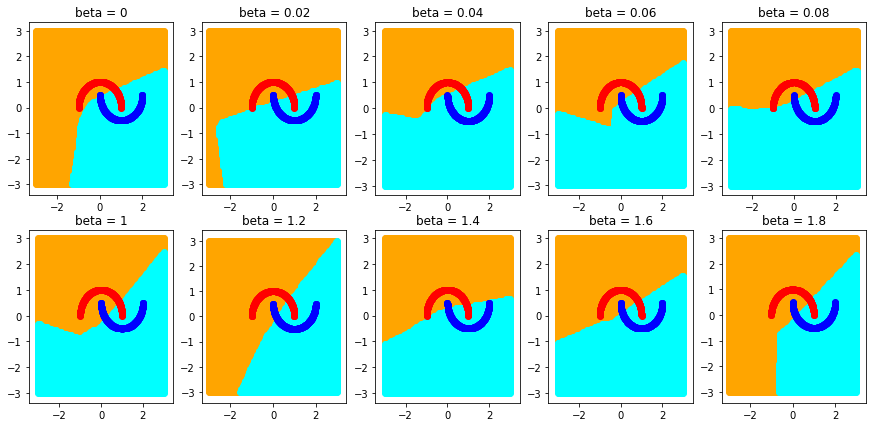

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:02.674
･ CPU:         0       7     1438 MB |
･ GPU:         2       0     1438 MB |


In [28]:
plt.figure(figsize=(15,7))
mp = genpoints(-3,3,-3,3,100)
for i in range(10):    
    y,idx = torch.max(torch.exp(p[i].forward(mp)),1)
    mp_r = mp[idx==0]
    mp_b = mp[idx==1]
    plt.subplot(2, 5, i+1)
    plt.scatter(mp_r[:,0].cpu(),mp_r[:,1].cpu(),color='orange')
    plt.scatter(mp_b[:,0].cpu(),mp_b[:,1].cpu(),color='cyan')
    plt.scatter(X[yn==1,0],X[yn==1,1],color='blue')
    plt.scatter(X[yn==0,0],X[yn==0,1],color='red')
    plt.title('beta = {}'.format(bhsh[i]))

## Varying b

where b is coeff. of $$||\dot{\omega}||^{2}$$

notes: why does int. time change as b changes?

In [63]:
def obtain_plot(bhsh, n=10):
    pl = {}
    for i in range(n):
        m = HDNN([2,8,8,8,2],'MLP',[1,bhsh[i],0.01],1,odeint='cpu').cuda()
        m.fit(trainloader,2,time_delta=None,iter_accuracy=10,ode_t=50,ode_step=2)
        pl[i] = m.predictor
        del m
    return pl

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:00.001
･ CPU:         0       0     1473 MB |
･ GPU:        -3       0     1614 MB |


In [59]:
p = []
bhsh = {0:0.5,1:1,2:1.5,3:2,4:2.5,5:3,6:3.5,7:4,8:4.5,9:5}
p = obtain_plot(bhsh, 10)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 8
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.      , 0.010005])
 t_events: None
        y: array([[ 1.87005222e-01,  1.95009494e-01],
       [-6.03262901e-01, -6.02885683e-01],
       [ 5.21944463e-01,  5.25562367e-01],
       [-1.97260916e-01, -1.95546531e-01],
       [ 5.31345785e-01,  5.40407069e-01],
       [-3.40312034e-01, -3.38810373e-01],
       [ 1.48828804e-01,  1.54910913e-01],
       [-4.91276383e-01, -4.87481463e-01],
       [ 3.02844703e-01,  3.06917036e-01],
       [-1.58596575e-01, -1.49093078e-01],
       [ 1.69050753e-01,  1.74080253e-01],
       [-4.58304316e-01, -4.50121157e-01],
       [ 6.84011579e-02,  7.22906628e-02],
       [-4.04138118e-01, -4.01429601e-01],
       [ 6.05556369e-02,  6.59938039e-02],
       [ 1.21372104e-01,  1.24389860e-01],
       [-5.41842639e-01, -5.39189322e-01],
       [-5.70270777e-01, -5.69116212e

odeint iter: 10 
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 14
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.00784036, 0.010005  ])
 t_events: None
        y: array([[ 0.25948381,  0.28335346,  0.28981243],
       [ 0.53814441,  0.53985122,  0.54031308],
       [-0.4787854 , -0.45779784, -0.45211868],
       ...,
       [ 0.58376688,  0.56567177,  0.56077486],
       [ 0.40105653,  0.38801232,  0.38448303],
       [ 0.27915621,  0.27101988,  0.26881583]])
odeint iter: 10 
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 14
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.00774443, 0.010005  ])
 t_events: None
        y: array([[ 5.62289059e-01,  5.89253037e-01,  5.96928458e-01],
       [-6.86401129e-03, -5.24611683e-04,  1.27935810e-03],
       [ 1.46195114e-01,  1.64182121e-01,  1.69

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 14
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.00385703, 0.010005  ])
 t_events: None
        y: array([[-0.57563305, -0.55431488, -0.52166294],
       [ 0.10263985,  0.12187284,  0.1513342 ],
       [-0.26194394, -0.24088989, -0.20863918],
       ...,
       [ 0.81550711,  0.79072448,  0.75276689],
       [ 0.72022331,  0.6986081 ,  0.66545851],
       [ 0.86155564,  0.83517198,  0.79480095]])
odeint iter: 10 
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 14
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.00727956, 0.010005  ])
 t_events: None
        y: array([[0.70608908, 0.74349114, 0.7568742 ],
       [0.27217942, 0.31981676, 0.33686225],
       [0.17843115, 0.20826532, 0.21893866],
       ...,
       [0.60004717, 0.56206537, 0.548

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:01.010
･ CPU:         0       0     1471 MB |
･ GPU:         4       0     1621 MB |


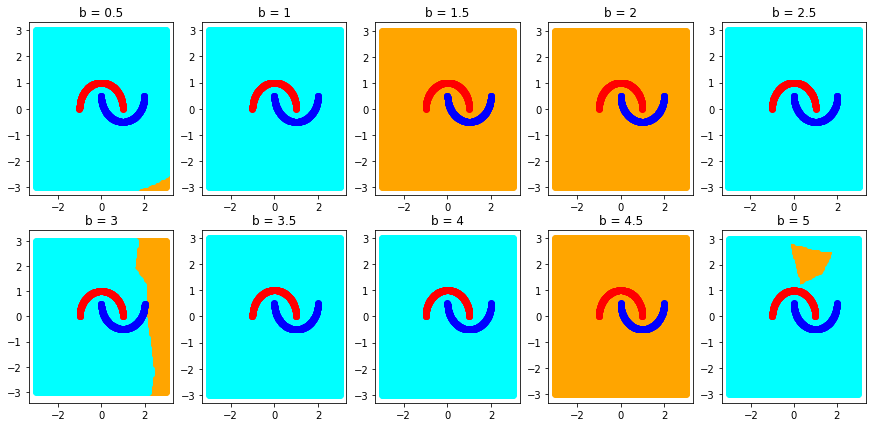

･ RAM: △Consumed △Peaked  Used Total | Exec time 0:00:02.755
･ CPU:         0       7     1473 MB |
･ GPU:         3       0     1625 MB |


In [60]:
plt.figure(figsize=(15,7))
mp = genpoints(-3,3,-3,3,100)
for i in range(10):    
    y,idx = torch.max(torch.exp(p[i].forward(mp)),1)
    mp_r = mp[idx==0]
    mp_b = mp[idx==1]
    plt.subplot(2, 5, i+1)
    plt.scatter(mp_r[:,0].cpu(),mp_r[:,1].cpu(),color='orange')
    plt.scatter(mp_b[:,0].cpu(),mp_b[:,1].cpu(),color='cyan')
    plt.scatter(X[yn==1,0],X[yn==1,1],color='blue')
    plt.scatter(X[yn==0,0],X[yn==0,1],color='red')
    plt.title('b = {}'.format(bhsh[i]))